## 1. Importation des bibliothèques.

In [96]:
import numpy as np 
import pandas as pd 

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [99]:
from sklearn.decomposition import PCA

## 2. Charger les données.

In [100]:
recettes = pd.read_excel("/Users/tatevikpiroyan/Documents/Master 1 DS/projet d\'études/gâteaux_recettes.xlsx")
recettes

,Catégories de gâteaux,Étiquettes diététiques associées,Nom du gâteau,Ingrédients,Ingrédients Crèmes,Description de préparation,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),Niveau de difficulté,Nom de la chaîne YouTube,Date de publication,Nombre de vue,Nombre d’abonnés,Lien de la vidéo
0,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau moelleux chocolat \n(sans beurre/gluten),"chocolat,\nmaïzena,\npoudre d'amandes,\nsucre,...",NaN,\n1°) Faites fondre 200g de chocolat noir au m...,30.0,50.0,180.0,facile,Hervé Cuisine,2016-05-06,243874,"1,46M",https://www.youtube.com/watch?v=_EKRPg-jmf0
1,gâteau aux amandes,sans gluten,le Namandier :\ngâteau aux amandes moelleux\n(...,"poudre d'amandes, \nsucre,\nbeurre,\nœuf,\neau...",NaN,1°) Préchauffez le four à 200°C.\n2°) Commence...,10.0,25.0,180.0,facile,il était une fois la pâtisserie,2016-09-12,141480,"2,5k",https://www.youtube.com/watch?v=aGBa6ayG78o
2,gâteau aux amandes,classique,le gâteau qui rend fou,"œuf,\nsucre,\nsel,\nlait,\nhuile végétale,\nfa...","œuf,\nsucre,\nsucre vanillé,\nmaïzena,\nlait",Crème :\n1°) Dans une casserole mélangez 1 œuf...,15.0,40.0,170.0,facile,Immer Appetitlich,2022-09-30,12183188,"1,33M",https://www.youtube.com/watch?v=2yT7hD_-fUw
3,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\nsucre,\nmaïzena,\nzestes d'un citron,\ns...",NaN,1°) Mélangez les 5 jaunes d'œufs avec 100g de ...,15.0,50.0,150.0,facile,CookingAddict00,2017-01-15,123321,112k,https://www.youtube.com/watch?v=phXNAqZXUSk
4,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau au chocolat\n(sans gluten),"œuf,\nchocolat",NaN,1°) Faites fondre au bain marie 200 g de choco...,5.0,25.0,180.0,facile,Un jour Une recette,2023-04-29,123547,"1,37M",https://www.youtube.com/watch?v=AZwPp6A0nTI
5,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\n yaourt nature végétal,\nhuile,\nfarine ...",NaN,1°) Battez 5 œufs avec 100g de sucre (brun) et...,15.0,35.0,150.0,facile,Vie_sans_gluten,2022-09-16,255,"19,9k",https://www.youtube.com/watch?v=GrwYYhTJKQU
6,gâteau moelleux,"sans gluten,\nsans lactose,\nvégétalien",Cambacérés :\ngâteau moelleux\n(sans gluten),"sucre,\nœuf,\nbeurre végétal,\nliqueur,\npoudr...",NaN,1°) Fouettez 4 œufs avec 60g ( ¼ cup) sucre (e...,15.0,20.0,180.0,facile,Un jour Une recette,2023-02-19,280792,"1,37M",https://www.youtube.com/watch?v=040furB_RhU
7,gâteau marbré,sans gluten,Cake marbré au cacao\n(sans gluten),"farine sans gluten,\nmaïzena,\nproduits laitie...",NaN,1°) Préchauffez le four à 200°C.\n2°) Fouettez...,20.0,25.0,180.0,facile,LILLOU CUISINE,2021-05-26,1578,"2,37k",https://www.youtube.com/watch?v=o9BLYLYUUPM
8,gâteau au citron,sans gluten,cake au citron\n(sans gluten),"sucre,\nhuile,\nmaïzena,\nœuf,\nfarine sans gl...",NaN,"1°) Récupérez les zestes d'un citron, puis le ...",15.0,40.0,175.0,facile,ELLE,2017-01-05,23974,539k,https://www.youtube.com/watch?v=S8X1a83hvr8
9,gâteau au citron,classique,gâteau moelleux au citron,"beurre,\nsucre,\nfarine,\nsel,\nlevure chimiqu...",NaN,1°) Fouettez 125g de beurre avec 125g de sucre...,15.0,30.0,180.0,facile,Hervé Cuisine,2016-03-22,1915369,"1,46M",https://www.youtube.com/watch?v=8hQYmP768-0


## 3. Nettoyage des données.

In [101]:
recettes.shape

(16, 15)

In [102]:
recettes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Catégories de gâteaux             16 non-null     object        
 1   Étiquettes diététiques associées  16 non-null     object        
 2   Nom du gâteau                     16 non-null     object        
 3   Ingrédients                       16 non-null     object        
 4   Ingrédients Crèmes                2 non-null      object        
 5   Description de préparation        16 non-null     object        
 6   Durée de préparation 
(en min)    15 non-null     float64       
 7   Durée de cuisson 
(en min)        15 non-null     float64       
 8   Température 
(en °C)              15 non-null     float64       
 9   Niveau de difficulté              15 non-null     object        
 10  Nom de la chaîne YouTube          16 non-null     ob

### Tester les valeurs manquantes.

In [103]:
recettes.isnull().sum()

Catégories de gâteaux                0
Étiquettes diététiques associées     0
Nom du gâteau                        0
Ingrédients                          0
Ingrédients Crèmes                  14
Description de préparation           0
Durée de préparation \n(en min)      1
Durée de cuisson \n(en min)          1
Température \n(en °C)                1
Niveau de difficulté                 1
Nom de la chaîne YouTube             0
Date de publication                  0
Nombre de vue                        0
Nombre d’abonnés                     0
Lien de la vidéo                     0
dtype: int64

In [104]:
# Supprimer la ligne à l'index 15 directement dans le DataFrame existant :
index = 15
rec = recettes.drop(index)
rec

,Catégories de gâteaux,Étiquettes diététiques associées,Nom du gâteau,Ingrédients,Ingrédients Crèmes,Description de préparation,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),Niveau de difficulté,Nom de la chaîne YouTube,Date de publication,Nombre de vue,Nombre d’abonnés,Lien de la vidéo
0,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau moelleux chocolat \n(sans beurre/gluten),"chocolat,\nmaïzena,\npoudre d'amandes,\nsucre,...",NaN,\n1°) Faites fondre 200g de chocolat noir au m...,30.0,50.0,180.0,facile,Hervé Cuisine,2016-05-06,243874,"1,46M",https://www.youtube.com/watch?v=_EKRPg-jmf0
1,gâteau aux amandes,sans gluten,le Namandier :\ngâteau aux amandes moelleux\n(...,"poudre d'amandes, \nsucre,\nbeurre,\nœuf,\neau...",NaN,1°) Préchauffez le four à 200°C.\n2°) Commence...,10.0,25.0,180.0,facile,il était une fois la pâtisserie,2016-09-12,141480,"2,5k",https://www.youtube.com/watch?v=aGBa6ayG78o
2,gâteau aux amandes,classique,le gâteau qui rend fou,"œuf,\nsucre,\nsel,\nlait,\nhuile végétale,\nfa...","œuf,\nsucre,\nsucre vanillé,\nmaïzena,\nlait",Crème :\n1°) Dans une casserole mélangez 1 œuf...,15.0,40.0,170.0,facile,Immer Appetitlich,2022-09-30,12183188,"1,33M",https://www.youtube.com/watch?v=2yT7hD_-fUw
3,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\nsucre,\nmaïzena,\nzestes d'un citron,\ns...",NaN,1°) Mélangez les 5 jaunes d'œufs avec 100g de ...,15.0,50.0,150.0,facile,CookingAddict00,2017-01-15,123321,112k,https://www.youtube.com/watch?v=phXNAqZXUSk
4,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau au chocolat\n(sans gluten),"œuf,\nchocolat",NaN,1°) Faites fondre au bain marie 200 g de choco...,5.0,25.0,180.0,facile,Un jour Une recette,2023-04-29,123547,"1,37M",https://www.youtube.com/watch?v=AZwPp6A0nTI
5,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\n yaourt nature végétal,\nhuile,\nfarine ...",NaN,1°) Battez 5 œufs avec 100g de sucre (brun) et...,15.0,35.0,150.0,facile,Vie_sans_gluten,2022-09-16,255,"19,9k",https://www.youtube.com/watch?v=GrwYYhTJKQU
6,gâteau moelleux,"sans gluten,\nsans lactose,\nvégétalien",Cambacérés :\ngâteau moelleux\n(sans gluten),"sucre,\nœuf,\nbeurre végétal,\nliqueur,\npoudr...",NaN,1°) Fouettez 4 œufs avec 60g ( ¼ cup) sucre (e...,15.0,20.0,180.0,facile,Un jour Une recette,2023-02-19,280792,"1,37M",https://www.youtube.com/watch?v=040furB_RhU
7,gâteau marbré,sans gluten,Cake marbré au cacao\n(sans gluten),"farine sans gluten,\nmaïzena,\nproduits laitie...",NaN,1°) Préchauffez le four à 200°C.\n2°) Fouettez...,20.0,25.0,180.0,facile,LILLOU CUISINE,2021-05-26,1578,"2,37k",https://www.youtube.com/watch?v=o9BLYLYUUPM
8,gâteau au citron,sans gluten,cake au citron\n(sans gluten),"sucre,\nhuile,\nmaïzena,\nœuf,\nfarine sans gl...",NaN,"1°) Récupérez les zestes d'un citron, puis le ...",15.0,40.0,175.0,facile,ELLE,2017-01-05,23974,539k,https://www.youtube.com/watch?v=S8X1a83hvr8
9,gâteau au citron,classique,gâteau moelleux au citron,"beurre,\nsucre,\nfarine,\nsel,\nlevure chimiqu...",NaN,1°) Fouettez 125g de beurre avec 125g de sucre...,15.0,30.0,180.0,facile,Hervé Cuisine,2016-03-22,1915369,"1,46M",https://www.youtube.com/watch?v=8hQYmP768-0


In [105]:
rec.isnull().sum()

Catégories de gâteaux                0
Étiquettes diététiques associées     0
Nom du gâteau                        0
Ingrédients                          0
Ingrédients Crèmes                  14
Description de préparation           0
Durée de préparation \n(en min)      0
Durée de cuisson \n(en min)          0
Température \n(en °C)                0
Niveau de difficulté                 0
Nom de la chaîne YouTube             0
Date de publication                  0
Nombre de vue                        0
Nombre d’abonnés                     0
Lien de la vidéo                     0
dtype: int64

### Types des variables.

In [106]:
rec.dtypes

Catégories de gâteaux                       object
Étiquettes diététiques associées            object
Nom du gâteau                               object
Ingrédients                                 object
Ingrédients Crèmes                          object
Description de préparation                  object
Durée de préparation \n(en min)            float64
Durée de cuisson \n(en min)                float64
Température \n(en °C)                      float64
Niveau de difficulté                        object
Nom de la chaîne YouTube                    object
Date de publication                 datetime64[ns]
Nombre de vue                                int64
Nombre d’abonnés                            object
Lien de la vidéo                            object
dtype: object

In [107]:
# Remplacer les NaN par 0 dans la colonne "Ingrédients Crèmes" :
rec["Ingrédients Crèmes"] = rec["Ingrédients Crèmes"].fillna(0)

# Mettre à jour les autres valeurs avec 1 :
rec["Ingrédients Crèmes"] = rec["Ingrédients Crèmes"].apply(lambda x: 1 if x != 0 else x)
rec

,Catégories de gâteaux,Étiquettes diététiques associées,Nom du gâteau,Ingrédients,Ingrédients Crèmes,Description de préparation,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),Niveau de difficulté,Nom de la chaîne YouTube,Date de publication,Nombre de vue,Nombre d’abonnés,Lien de la vidéo
0,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau moelleux chocolat \n(sans beurre/gluten),"chocolat,\nmaïzena,\npoudre d'amandes,\nsucre,...",0,\n1°) Faites fondre 200g de chocolat noir au m...,30.0,50.0,180.0,facile,Hervé Cuisine,2016-05-06,243874,"1,46M",https://www.youtube.com/watch?v=_EKRPg-jmf0
1,gâteau aux amandes,sans gluten,le Namandier :\ngâteau aux amandes moelleux\n(...,"poudre d'amandes, \nsucre,\nbeurre,\nœuf,\neau...",0,1°) Préchauffez le four à 200°C.\n2°) Commence...,10.0,25.0,180.0,facile,il était une fois la pâtisserie,2016-09-12,141480,"2,5k",https://www.youtube.com/watch?v=aGBa6ayG78o
2,gâteau aux amandes,classique,le gâteau qui rend fou,"œuf,\nsucre,\nsel,\nlait,\nhuile végétale,\nfa...",1,Crème :\n1°) Dans une casserole mélangez 1 œuf...,15.0,40.0,170.0,facile,Immer Appetitlich,2022-09-30,12183188,"1,33M",https://www.youtube.com/watch?v=2yT7hD_-fUw
3,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\nsucre,\nmaïzena,\nzestes d'un citron,\ns...",0,1°) Mélangez les 5 jaunes d'œufs avec 100g de ...,15.0,50.0,150.0,facile,CookingAddict00,2017-01-15,123321,112k,https://www.youtube.com/watch?v=phXNAqZXUSk
4,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau au chocolat\n(sans gluten),"œuf,\nchocolat",0,1°) Faites fondre au bain marie 200 g de choco...,5.0,25.0,180.0,facile,Un jour Une recette,2023-04-29,123547,"1,37M",https://www.youtube.com/watch?v=AZwPp6A0nTI
5,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\n yaourt nature végétal,\nhuile,\nfarine ...",0,1°) Battez 5 œufs avec 100g de sucre (brun) et...,15.0,35.0,150.0,facile,Vie_sans_gluten,2022-09-16,255,"19,9k",https://www.youtube.com/watch?v=GrwYYhTJKQU
6,gâteau moelleux,"sans gluten,\nsans lactose,\nvégétalien",Cambacérés :\ngâteau moelleux\n(sans gluten),"sucre,\nœuf,\nbeurre végétal,\nliqueur,\npoudr...",0,1°) Fouettez 4 œufs avec 60g ( ¼ cup) sucre (e...,15.0,20.0,180.0,facile,Un jour Une recette,2023-02-19,280792,"1,37M",https://www.youtube.com/watch?v=040furB_RhU
7,gâteau marbré,sans gluten,Cake marbré au cacao\n(sans gluten),"farine sans gluten,\nmaïzena,\nproduits laitie...",0,1°) Préchauffez le four à 200°C.\n2°) Fouettez...,20.0,25.0,180.0,facile,LILLOU CUISINE,2021-05-26,1578,"2,37k",https://www.youtube.com/watch?v=o9BLYLYUUPM
8,gâteau au citron,sans gluten,cake au citron\n(sans gluten),"sucre,\nhuile,\nmaïzena,\nœuf,\nfarine sans gl...",0,"1°) Récupérez les zestes d'un citron, puis le ...",15.0,40.0,175.0,facile,ELLE,2017-01-05,23974,539k,https://www.youtube.com/watch?v=S8X1a83hvr8
9,gâteau au citron,classique,gâteau moelleux au citron,"beurre,\nsucre,\nfarine,\nsel,\nlevure chimiqu...",0,1°) Fouettez 125g de beurre avec 125g de sucre...,15.0,30.0,180.0,facile,Hervé Cuisine,2016-03-22,1915369,"1,46M",https://www.youtube.com/watch?v=8hQYmP768-0


In [108]:
rec.dtypes

Catégories de gâteaux                       object
Étiquettes diététiques associées            object
Nom du gâteau                               object
Ingrédients                                 object
Ingrédients Crèmes                           int64
Description de préparation                  object
Durée de préparation \n(en min)            float64
Durée de cuisson \n(en min)                float64
Température \n(en °C)                      float64
Niveau de difficulté                        object
Nom de la chaîne YouTube                    object
Date de publication                 datetime64[ns]
Nombre de vue                                int64
Nombre d’abonnés                            object
Lien de la vidéo                            object
dtype: object

In [109]:
# Convertir toutes les colonnes de float à int :
colonnes = ["Durée de préparation \n(en min)", "Durée de cuisson \n(en min)", "Température \n(en °C)"]
rec[colonnes] = rec[colonnes].astype(int)
rec

,Catégories de gâteaux,Étiquettes diététiques associées,Nom du gâteau,Ingrédients,Ingrédients Crèmes,Description de préparation,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),Niveau de difficulté,Nom de la chaîne YouTube,Date de publication,Nombre de vue,Nombre d’abonnés,Lien de la vidéo
0,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau moelleux chocolat \n(sans beurre/gluten),"chocolat,\nmaïzena,\npoudre d'amandes,\nsucre,...",0,\n1°) Faites fondre 200g de chocolat noir au m...,30,50,180,facile,Hervé Cuisine,2016-05-06,243874,"1,46M",https://www.youtube.com/watch?v=_EKRPg-jmf0
1,gâteau aux amandes,sans gluten,le Namandier :\ngâteau aux amandes moelleux\n(...,"poudre d'amandes, \nsucre,\nbeurre,\nœuf,\neau...",0,1°) Préchauffez le four à 200°C.\n2°) Commence...,10,25,180,facile,il était une fois la pâtisserie,2016-09-12,141480,"2,5k",https://www.youtube.com/watch?v=aGBa6ayG78o
2,gâteau aux amandes,classique,le gâteau qui rend fou,"œuf,\nsucre,\nsel,\nlait,\nhuile végétale,\nfa...",1,Crème :\n1°) Dans une casserole mélangez 1 œuf...,15,40,170,facile,Immer Appetitlich,2022-09-30,12183188,"1,33M",https://www.youtube.com/watch?v=2yT7hD_-fUw
3,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\nsucre,\nmaïzena,\nzestes d'un citron,\ns...",0,1°) Mélangez les 5 jaunes d'œufs avec 100g de ...,15,50,150,facile,CookingAddict00,2017-01-15,123321,112k,https://www.youtube.com/watch?v=phXNAqZXUSk
4,gâteau au chocolat,"sans gluten,\nsans lactose",gâteau au chocolat\n(sans gluten),"œuf,\nchocolat",0,1°) Faites fondre au bain marie 200 g de choco...,5,25,180,facile,Un jour Une recette,2023-04-29,123547,"1,37M",https://www.youtube.com/watch?v=AZwPp6A0nTI
5,gâteau moelleux,"sans gluten,\nsans lactose",gâteau moelleux \n(sans gluten),"œuf,\n yaourt nature végétal,\nhuile,\nfarine ...",0,1°) Battez 5 œufs avec 100g de sucre (brun) et...,15,35,150,facile,Vie_sans_gluten,2022-09-16,255,"19,9k",https://www.youtube.com/watch?v=GrwYYhTJKQU
6,gâteau moelleux,"sans gluten,\nsans lactose,\nvégétalien",Cambacérés :\ngâteau moelleux\n(sans gluten),"sucre,\nœuf,\nbeurre végétal,\nliqueur,\npoudr...",0,1°) Fouettez 4 œufs avec 60g ( ¼ cup) sucre (e...,15,20,180,facile,Un jour Une recette,2023-02-19,280792,"1,37M",https://www.youtube.com/watch?v=040furB_RhU
7,gâteau marbré,sans gluten,Cake marbré au cacao\n(sans gluten),"farine sans gluten,\nmaïzena,\nproduits laitie...",0,1°) Préchauffez le four à 200°C.\n2°) Fouettez...,20,25,180,facile,LILLOU CUISINE,2021-05-26,1578,"2,37k",https://www.youtube.com/watch?v=o9BLYLYUUPM
8,gâteau au citron,sans gluten,cake au citron\n(sans gluten),"sucre,\nhuile,\nmaïzena,\nœuf,\nfarine sans gl...",0,"1°) Récupérez les zestes d'un citron, puis le ...",15,40,175,facile,ELLE,2017-01-05,23974,539k,https://www.youtube.com/watch?v=S8X1a83hvr8
9,gâteau au citron,classique,gâteau moelleux au citron,"beurre,\nsucre,\nfarine,\nsel,\nlevure chimiqu...",0,1°) Fouettez 125g de beurre avec 125g de sucre...,15,30,180,facile,Hervé Cuisine,2016-03-22,1915369,"1,46M",https://www.youtube.com/watch?v=8hQYmP768-0


In [110]:
rec.dtypes

Catégories de gâteaux                       object
Étiquettes diététiques associées            object
Nom du gâteau                               object
Ingrédients                                 object
Ingrédients Crèmes                           int64
Description de préparation                  object
Durée de préparation \n(en min)              int64
Durée de cuisson \n(en min)                  int64
Température \n(en °C)                        int64
Niveau de difficulté                        object
Nom de la chaîne YouTube                    object
Date de publication                 datetime64[ns]
Nombre de vue                                int64
Nombre d’abonnés                            object
Lien de la vidéo                            object
dtype: object

In [111]:
rec.isnull().sum()

Catégories de gâteaux               0
Étiquettes diététiques associées    0
Nom du gâteau                       0
Ingrédients                         0
Ingrédients Crèmes                  0
Description de préparation          0
Durée de préparation \n(en min)     0
Durée de cuisson \n(en min)         0
Température \n(en °C)               0
Niveau de difficulté                0
Nom de la chaîne YouTube            0
Date de publication                 0
Nombre de vue                       0
Nombre d’abonnés                    0
Lien de la vidéo                    0
dtype: int64

### Tester les doublants.

In [112]:
rec.duplicated().sum()

0

### Normalisation des données.

##### Ingrédients, Catégories de gâteaux,  Étiquettes diététiques associées :

In [113]:
from sklearn.preprocessing import MultiLabelBinarizer

# Séparer les valeurs des colonnes "Ingrédients", "Catégories de gâteaux" et "Étiquettes Diététiques Associées" :
rec['Ingrédients'] = rec['Ingrédients'].apply(lambda x: [ingredient.strip() for ingredient in x.split(',')])
rec['Catégories de gâteaux'] = rec['Catégories de gâteaux'].apply(lambda x: [categorie.strip() for categorie in x.split(',')])
rec['Étiquettes diététiques associées'] = rec['Étiquettes diététiques associées'].apply(lambda x: [etiquette.strip() for etiquette in x.split(',')])

# Utilisation de MultiLabelBinarizer pour la vectorisation des ingrédients :
mlb_ingredients = MultiLabelBinarizer()
ingredient_features = mlb_ingredients.fit_transform(rec['Ingrédients'])

# Utilisation de MultiLabelBinarizer pour la vectorisation des catégories de gâteaux :
mlb_categories = MultiLabelBinarizer()
categories_features = mlb_categories.fit_transform(rec['Catégories de gâteaux'])

# Utilisation de MultiLabelBinarizer pour la vectorisation des étiquettes diététiques :
mlb_etiquettes = MultiLabelBinarizer()
etiquettes_features = mlb_etiquettes.fit_transform(rec['Étiquettes diététiques associées'])

# Conversion en DataFrames :
ingredient_df = pd.DataFrame(ingredient_features, columns=mlb_ingredients.classes_)
categories_df = pd.DataFrame(categories_features, columns=mlb_categories.classes_)
etiquettes_df = pd.DataFrame(etiquettes_features, columns=mlb_etiquettes.classes_)

# Regrouper les colonnes par nom d'ingrédient et sommer les valeurs :
ingredient_df = ingredient_df.groupby(ingredient_df.columns, axis=1).sum()

# Regrouper les colonnes par nom de catégorie et sommer les valeurs :
categories_df = categories_df.groupby(categories_df.columns, axis=1).sum()

# Regrouper les colonnes par nom d'étiquette et sommer les valeurs :
etiquettes_df = etiquettes_df.groupby(etiquettes_df.columns, axis=1).sum()

# Filtrer les colonnes dont la somme est supérieure à 0 (pour éviter les duplications) :
ingredient_df = ingredient_df.loc[:, ingredient_df.sum() > 0]
categories_df = categories_df.loc[:, categories_df.sum() > 0]
etiquettes_df = etiquettes_df.loc[:, etiquettes_df.sum() > 0]

In [114]:
ingredient_df

,amandes tranchées,beurre,beurre végétal,bicarbonate de soude,cacao,café,chocolat,compote de pomme,eau de fleur d'oranger,farine,...,produits laitiers,purée de fruit,sel,sucre,sucre en poudre,sucre vanillé,vanille,yaourt nature végétal,zestes d'un citron,œuf
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
9,0,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1


In [115]:
ingredient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   amandes tranchées                       15 non-null     int64
 1   beurre                                  15 non-null     int64
 2   beurre végétal                          15 non-null     int64
 3   bicarbonate de soude                    15 non-null     int64
 4   cacao                                   15 non-null     int64
 5   café                                    15 non-null     int64
 6   chocolat                                15 non-null     int64
 7   compote de pomme                        15 non-null     int64
 8   eau de fleur d'oranger                  15 non-null     int64
 9   farine                                  15 non-null     int64
 10  farine sans gluten                      15 non-null     int64
 11  flocons d'avoine en p

In [116]:
categories_df

,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1
6,0,0,0,0,1
7,0,0,0,1,0
8,0,1,0,0,0
9,0,1,0,0,0


In [117]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gâteau au chocolat  15 non-null     int64
 1   gâteau au citron    15 non-null     int64
 2   gâteau aux amandes  15 non-null     int64
 3   gâteau marbré       15 non-null     int64
 4   gâteau moelleux     15 non-null     int64
dtypes: int64(5)
memory usage: 720.0 bytes


In [118]:
etiquettes_df

,classique,sans gluten,sans lactose,végétalien
0,0,1,1,0
1,0,1,0,0
2,1,0,0,0
3,0,1,1,0
4,0,1,1,0
5,0,1,1,0
6,0,1,1,1
7,0,1,0,0
8,0,1,0,0
9,1,0,0,0


In [119]:
etiquettes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   classique     15 non-null     int64
 1   sans gluten   15 non-null     int64
 2   sans lactose  15 non-null     int64
 3   végétalien    15 non-null     int64
dtypes: int64(4)
memory usage: 600.0 bytes


In [120]:
# Supprimer les colonnes redondantes :
ingredient_df = ingredient_df.loc[:, ~ingredient_df.columns.duplicated()]
categories_df = categories_df.loc[:, ~categories_df.columns.duplicated()]
etiquettes_df = etiquettes_df.loc[:, ~etiquettes_df.columns.duplicated()]

# Concaténer les nouvelles DataFrames avec le DataFrame principal :
rec_2 = pd.concat([rec, ingredient_df, categories_df, etiquettes_df], axis=1)
rec_2

,Catégories de gâteaux,Étiquettes diététiques associées,Nom du gâteau,Ingrédients,Ingrédients Crèmes,Description de préparation,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),Niveau de difficulté,...,œuf,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux,classique,sans gluten,sans lactose,végétalien
0,[gâteau au chocolat],"[sans gluten, sans lactose]",gâteau moelleux chocolat \n(sans beurre/gluten),"[chocolat, maïzena, poudre d'amandes, sucre, œ...",0,\n1°) Faites fondre 200g de chocolat noir au m...,30,50,180,facile,...,1,1,0,0,0,0,0,1,1,0
1,[gâteau aux amandes],[sans gluten],le Namandier :\ngâteau aux amandes moelleux\n(...,"[poudre d'amandes, sucre, beurre, œuf, eau de ...",0,1°) Préchauffez le four à 200°C.\n2°) Commence...,10,25,180,facile,...,1,0,0,1,0,0,0,1,0,0
2,[gâteau aux amandes],[classique],le gâteau qui rend fou,"[œuf, sucre, sel, lait, huile végétale, farine...",1,Crème :\n1°) Dans une casserole mélangez 1 œuf...,15,40,170,facile,...,1,0,0,1,0,0,1,0,0,0
3,[gâteau moelleux],"[sans gluten, sans lactose]",gâteau moelleux \n(sans gluten),"[œuf, sucre, maïzena, zestes d'un citron, sucr...",0,1°) Mélangez les 5 jaunes d'œufs avec 100g de ...,15,50,150,facile,...,1,0,0,0,0,1,0,1,1,0
4,[gâteau au chocolat],"[sans gluten, sans lactose]",gâteau au chocolat\n(sans gluten),"[œuf, chocolat]",0,1°) Faites fondre au bain marie 200 g de choco...,5,25,180,facile,...,1,1,0,0,0,0,0,1,1,0
5,[gâteau moelleux],"[sans gluten, sans lactose]",gâteau moelleux \n(sans gluten),"[œuf, yaourt nature végétal, huile, farine san...",0,1°) Battez 5 œufs avec 100g de sucre (brun) et...,15,35,150,facile,...,1,0,0,0,0,1,0,1,1,0
6,[gâteau moelleux],"[sans gluten, sans lactose, végétalien]",Cambacérés :\ngâteau moelleux\n(sans gluten),"[sucre, œuf, beurre végétal, liqueur, poudre d...",0,1°) Fouettez 4 œufs avec 60g ( ¼ cup) sucre (e...,15,20,180,facile,...,1,0,0,0,0,1,0,1,1,1
7,[gâteau marbré],[sans gluten],Cake marbré au cacao\n(sans gluten),"[farine sans gluten, maïzena, produits laitier...",0,1°) Préchauffez le four à 200°C.\n2°) Fouettez...,20,25,180,facile,...,1,0,0,0,1,0,0,1,0,0
8,[gâteau au citron],[sans gluten],cake au citron\n(sans gluten),"[sucre, huile, maïzena, œuf, farine sans glute...",0,"1°) Récupérez les zestes d'un citron, puis le ...",15,40,175,facile,...,1,0,1,0,0,0,0,1,0,0
9,[gâteau au citron],[classique],gâteau moelleux au citron,"[beurre, sucre, farine, sel, levure chimique, ...",0,1°) Fouettez 125g de beurre avec 125g de sucre...,15,30,180,facile,...,1,0,1,0,0,0,1,0,0,0


In [121]:
# Créer une nouvelle DataFrame en supprimant les 3 colonnes :
rec_3 = rec_2.drop(columns=['Ingrédients', 'Catégories de gâteaux', 'Étiquettes diététiques associées'])
rec_3

,Nom du gâteau,Ingrédients Crèmes,Description de préparation,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),Niveau de difficulté,Nom de la chaîne YouTube,Date de publication,Nombre de vue,...,œuf,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux,classique,sans gluten,sans lactose,végétalien
0,gâteau moelleux chocolat \n(sans beurre/gluten),0,\n1°) Faites fondre 200g de chocolat noir au m...,30,50,180,facile,Hervé Cuisine,2016-05-06,243874,...,1,1,0,0,0,0,0,1,1,0
1,le Namandier :\ngâteau aux amandes moelleux\n(...,0,1°) Préchauffez le four à 200°C.\n2°) Commence...,10,25,180,facile,il était une fois la pâtisserie,2016-09-12,141480,...,1,0,0,1,0,0,0,1,0,0
2,le gâteau qui rend fou,1,Crème :\n1°) Dans une casserole mélangez 1 œuf...,15,40,170,facile,Immer Appetitlich,2022-09-30,12183188,...,1,0,0,1,0,0,1,0,0,0
3,gâteau moelleux \n(sans gluten),0,1°) Mélangez les 5 jaunes d'œufs avec 100g de ...,15,50,150,facile,CookingAddict00,2017-01-15,123321,...,1,0,0,0,0,1,0,1,1,0
4,gâteau au chocolat\n(sans gluten),0,1°) Faites fondre au bain marie 200 g de choco...,5,25,180,facile,Un jour Une recette,2023-04-29,123547,...,1,1,0,0,0,0,0,1,1,0
5,gâteau moelleux \n(sans gluten),0,1°) Battez 5 œufs avec 100g de sucre (brun) et...,15,35,150,facile,Vie_sans_gluten,2022-09-16,255,...,1,0,0,0,0,1,0,1,1,0
6,Cambacérés :\ngâteau moelleux\n(sans gluten),0,1°) Fouettez 4 œufs avec 60g ( ¼ cup) sucre (e...,15,20,180,facile,Un jour Une recette,2023-02-19,280792,...,1,0,0,0,0,1,0,1,1,1
7,Cake marbré au cacao\n(sans gluten),0,1°) Préchauffez le four à 200°C.\n2°) Fouettez...,20,25,180,facile,LILLOU CUISINE,2021-05-26,1578,...,1,0,0,0,1,0,0,1,0,0
8,cake au citron\n(sans gluten),0,"1°) Récupérez les zestes d'un citron, puis le ...",15,40,175,facile,ELLE,2017-01-05,23974,...,1,0,1,0,0,0,0,1,0,0
9,gâteau moelleux au citron,0,1°) Fouettez 125g de beurre avec 125g de sucre...,15,30,180,facile,Hervé Cuisine,2016-03-22,1915369,...,1,0,1,0,0,0,1,0,0,0


In [122]:
rec_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Nom du gâteau                           15 non-null     object        
 1   Ingrédients Crèmes                      15 non-null     int64         
 2   Description de préparation              15 non-null     object        
 3   Durée de préparation 
(en min)          15 non-null     int64         
 4   Durée de cuisson 
(en min)              15 non-null     int64         
 5   Température 
(en °C)                    15 non-null     int64         
 6   Niveau de difficulté                    15 non-null     object        
 7   Nom de la chaîne YouTube                15 non-null     object        
 8   Date de publication                     15 non-null     datetime64[ns]
 9   Nombre de vue                           15 non-null     

### Nouvelle DataFrame pour faire Clustering.

In [123]:
# Liste des colonnes à exclure :
colonnes = ['Nom du gâteau', 'Description de préparation', 'Niveau de difficulté', 'Nom de la chaîne YouTube', 'Date de publication', 'Nombre de vue', 'Nombre d’abonnés', 'Lien de la vidéo']

# Créer une nouvelle DataFrame en excluant les colonnes :
recette = rec_3.drop(columns=colonnes)
recette

,Ingrédients Crèmes,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),amandes tranchées,beurre,beurre végétal,bicarbonate de soude,cacao,café,...,œuf,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux,classique,sans gluten,sans lactose,végétalien
0,0,30,50,180,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
1,0,10,25,180,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,15,40,170,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,15,50,150,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,0,5,25,180,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
5,0,15,35,150,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
6,0,15,20,180,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,1
7,0,20,25,180,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
8,0,15,40,175,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
9,0,15,30,180,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [124]:
recette.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Ingrédients Crèmes                      15 non-null     int64
 1   Durée de préparation 
(en min)          15 non-null     int64
 2   Durée de cuisson 
(en min)              15 non-null     int64
 3   Température 
(en °C)                    15 non-null     int64
 4   amandes tranchées                       15 non-null     int64
 5   beurre                                  15 non-null     int64
 6   beurre végétal                          15 non-null     int64
 7   bicarbonate de soude                    15 non-null     int64
 8   cacao                                   15 non-null     int64
 9   café                                    15 non-null     int64
 10  chocolat                                15 non-null     int64
 11  compote de pomme     

## 4. Analyse en Composantes Principales (ACP).

In [125]:
# Créer un objet PCA :
pca = PCA()

# Appliquer l'ACP aux données normalisées :
principal_composantes = pca.fit_transform(recette)
principal_composantes

array([[ 8.93626466e+00,  1.85384714e+01, -8.65715436e+00,
        -5.71776418e-01, -3.66809111e-01, -4.66717951e-02,
        -2.54366019e-01,  1.32174135e-01, -2.85879594e-01,
        -1.58659079e-02,  4.99827897e-01,  1.18840543e-01,
         2.70033897e-01, -4.44134288e-01,  5.10811874e-16],
       [-1.06326496e+01, -3.26100466e+00,  4.54832958e+00,
         1.68222577e-01, -3.63716144e-02, -9.28825317e-01,
         2.06912481e-01, -4.25965832e-01, -8.41709001e-02,
         8.17023529e-01,  9.28981104e-01,  6.31781639e-01,
         2.54969643e-01,  1.16625606e-01,  5.10811874e-16],
       [ 7.46929295e+00,  8.14414013e-01,  1.99833028e+00,
         2.16695813e+00, -1.67776638e+00, -1.82349729e-01,
         2.74691888e-01, -1.05544853e+00,  3.17253114e-01,
        -5.01464137e-01,  9.95349522e-02, -2.14064374e-01,
        -2.13892288e-01, -7.86514940e-02,  5.10811874e-16],
       [ 2.84798629e+01, -6.95875611e+00,  1.36192196e+00,
        -4.83660217e-01, -1.91456105e-01, -1.13633552

#### Sélection du Nombre de Composantes.

Déterminons combien de composantes principales sont nécessaires pour conserver l'information pertinente.

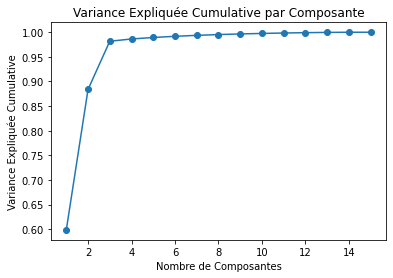

In [126]:
# Tracer le pourcentage de variance expliquée par chaque composante :
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulative')
plt.title('Variance Expliquée Cumulative par Composante')
plt.show()

* "explained_variance_ratio_" contient un tableau des pourcentages de variance expliquée pour chaque composante (en ordre décroissant).
* "explained_variance_ratio.cumsum()" calcule la somme cumulative des pourcentages de variance expliquée. Elle montre comment la variance totale s'accumule à mesure que l'on ajoute plus de composantes. 
* Le paramètre "marker='o'" ajoute des points sur la courbe pour indiquer chaque composante.

On sélectionne 3 comme un nombre de composantes principales qui capture une grande proportion de la variance totale. 

#### Réduction de Dimensionnalité avec l'ACP.

On utilise les composantes principales sélectionnées pour réduire la dimensionnalité de nos données.

In [127]:
# Sélectionner le nombre de composantes principales à conserver :
nb_composantes = 3

# Sélectionner les premières composantes principales :
selec_composantes = principal_composantes[:, :nb_composantes]
selec_composantes

array([[  8.93626466,  18.53847139,  -8.65715436],
       [-10.63264964,  -3.26100466,   4.54832958],
       [  7.46929295,   0.81441401,   1.99833028],
       [ 28.47986286,  -6.95875611,   1.36192196],
       [-11.00654407,  -4.59954229,   9.28538969],
       [ 17.67162724, -16.75241479,  -2.34815456],
       [-13.83130678,  -5.15837636,  -1.54645383],
       [ -9.84444977,  -0.56126906,  -5.23153756],
       [  4.04890851,   4.25201774,   2.54428988],
       [ -6.62259695,   1.37143498,   1.02142822],
       [  0.57014062,   7.92386263,   3.36788314],
       [-17.06450059,  -6.93140881,  -7.55990845],
       [  0.68875163,  -4.47728697,  -5.42759487],
       [ -3.02828394,   4.63654318,   2.16613787],
       [  4.16548326,  11.16331514,   4.47709301]])

## 5. K-Means Clustering.

Appliquons le K-Means Clustering sur les composantes principales réduites.

In [128]:
# Créer un objet KMeans :
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)

# Effectuer le K-Means Clustering sur les données réduites :
clusters = kmeans.fit_predict(selec_composantes)
clusters

/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

#### Analyse des Résultats.

In [129]:
# Ajouter les étiquettes de cluster au DataFrame original :
recette['Cluster'] = clusters

# Analyser les caractéristiques des clusters :
cluster_summary = recette.groupby('Cluster').mean()
cluster_summary

,Ingrédients Crèmes,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),amandes tranchées,beurre,beurre végétal,bicarbonate de soude,cacao,café,...,œuf,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux,classique,sans gluten,sans lactose,végétalien
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.166667,17.5,41.666667,177.500000,0.166667,0.000000,0.000000,0.333333,0.166667,0.166667,...,0.833333,0.666667,0.166667,0.333333,0.000000,0.000000,0.166667,0.666667,0.666667,0.166667
1,0.000000,15.0,24.285714,178.571429,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,...,1.000000,0.285714,0.142857,0.142857,0.285714,0.142857,0.142857,0.857143,0.571429,0.142857
2,0.000000,15.0,42.500000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000


#### Évaluation des Clusters.

Utilisons des métriques comme l'inertie et la silhouette pour évaluer la qualité des clusters.

In [130]:
from sklearn.metrics import silhouette_score

# Évaluation avec la silhouette score
silhouette_avg = silhouette_score(selec_composantes, clusters)
print("Silhouette Score moyen :", silhouette_avg)

Silhouette Score moyen : 0.4092370801492402


#### Ajustements et Validation : Détermination du Nombre Optimal de Clusters : Méthode du Coude (Elbow method).

In [132]:
inertia_values = []

# Essayer différents nombres de clusters de 2 à 10 :
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(selec_composantes)
    
    # Calcul de l'inertie pour le modèle actuel
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
    # Affichage de l'inertie pour chaque nombre de clusters
    print(f"Nombre de clusters : {num_clusters}, Inertie : {inertia}")

Nombre de clusters : 2, Inertie : 1988.737649356663
Nombre de clusters : 3, Inertie : 985.1172614558413
Nombre de clusters : 4, Inertie : 698.1075573192074
Nombre de clusters : 5, Inertie : 528.4232559627092
Nombre de clusters : 6, Inertie : 412.2898469573437
Nombre de clusters : 7, Inertie : 262.1082593469041
Nombre de clusters : 8, Inertie : 178.4013154941173
Nombre de clusters : 9, Inertie : 115.02875736126508


/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

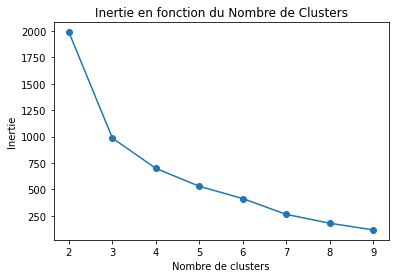

In [133]:
# Tracer de l'inertie en fonction du nombre de clusters :
plt.plot(range(2, 10), inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Inertie en fonction du Nombre de Clusters')
plt.show()

On constate 3 clusters.

#### Interprétation des Clusters.

In [134]:
# Créer un modèle KMeans avec le nombre optimal de clusters :
num_clusters_optimal = 3 
kmeans_optimal = KMeans(n_clusters=num_clusters_optimal)
kmeans_optimal.fit(selec_composantes)

# Attribuer les clusters aux données :
clusters_optimal = kmeans_optimal.predict(selec_composantes)

# Ajouter les étiquettes de cluster au DataFrame original :
recette['Cluster'] = clusters_optimal

# Analyser les caractéristiques des clusters :
cluster_summary = recette.groupby('Cluster').mean()
cluster_summary

/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Ingrédients Crèmes,Durée de préparation \n(en min),Durée de cuisson \n(en min),Température \n(en °C),amandes tranchées,beurre,beurre végétal,bicarbonate de soude,cacao,café,...,œuf,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux,classique,sans gluten,sans lactose,végétalien
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,15.0,42.500000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,0.000000,15.0,24.285714,178.571429,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,...,1.000000,0.285714,0.142857,0.142857,0.285714,0.142857,0.142857,0.857143,0.571429,0.142857
2,0.166667,17.5,41.666667,177.500000,0.166667,0.000000,0.000000,0.333333,0.166667,0.166667,...,0.833333,0.666667,0.166667,0.333333,0.000000,0.000000,0.166667,0.666667,0.666667,0.166667


#### Visualisation des Clusters avec Centres de Cluster.

/Users/tatevikpiroyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


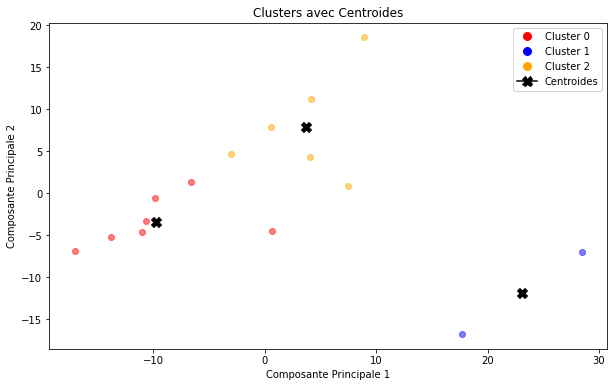

In [135]:
# Appliquer le K-Means Clustering sur les données réduites :
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(selec_composantes)

# Obtenir les centroïdes des clusters :
centroids = kmeans.cluster_centers_

# Créer un diagramme de dispersion pour visualiser les clusters avec les centroïdes :
plt.figure(figsize=(10, 6))

# Couleurs pour les trois clusters :
colors = ['red', 'blue', 'orange']

# Boucle pour tracer les points de chaque cluster avec la bonne couleur :
for i in range(len(clusters)):
    plt.scatter(selec_composantes[i, 0], selec_composantes[i, 1], color=colors[clusters[i]], alpha=0.5)

# Tracer les centroïdes des clusters avec des marqueurs "x" :
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='X', color='black', s=100)

# Créer des objets proxy pour la légende avec les couleurs correctes :
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i}') for i in range(3)]
legend_elements.append(plt.Line2D([0], [0], marker='X', color='black', markersize=10, label='Centroides'))

# Afficher la légende :
plt.legend(handles=legend_elements, loc='upper right')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters avec Centroides')
plt.show()

## 6. Analyse et Visualisation.

##### Durée de préparation (en min) :

In [136]:
# Calcul des statistiques descriptives pour chaque attribut numérique dans chaque cluster :
cluster_prép_stats = recette.groupby('Cluster')[['Durée de préparation \n(en min)']].describe()
cluster_prép_stats

Durée de préparation \n(en min)                                    \
                                  count  mean       std   min   25%   50%   
Cluster                                                                     
0                                   2.0  15.0  0.000000  15.0  15.0  15.0   
1                                   7.0  15.0  5.773503   5.0  12.5  15.0   
2                                   6.0  17.5  6.123724  15.0  15.0  15.0   

                     
          75%   max  
Cluster              
0        15.0  15.0  
1        20.0  20.0  
2        15.0  30.0

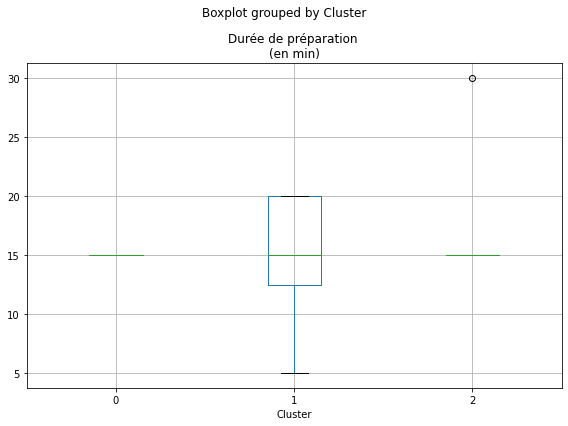

In [137]:
# Boxplot pour la durée de préparation en fonction des clusters :
fig, ax = plt.subplots(figsize=(8, 6))
recette.boxplot(column='Durée de préparation \n(en min)', by='Cluster', ax=ax)
ax.set_title('Durée de préparation \n(en min)')
plt.tight_layout()
plt.show()

##### Durée de cuisson (en min) :

In [138]:
# Calcul des statistiques descriptives pour chaque attribut numérique dans chaque cluster :
cluster_cuisson_stats = recette.groupby('Cluster')[['Durée de cuisson \n(en min)']].describe()
cluster_cuisson_stats

Durée de cuisson \n(en min)                                           \
                              count       mean        std   min    25%   50%   
Cluster                                                                        
0                               2.0  42.500000  10.606602  35.0  38.75  42.5   
1                               7.0  24.285714   5.345225  15.0  22.50  25.0   
2                               6.0  41.666667   5.163978  35.0  40.00  40.0   

                      
           75%   max  
Cluster               
0        46.25  50.0  
1        27.50  30.0  
2        43.75  50.0

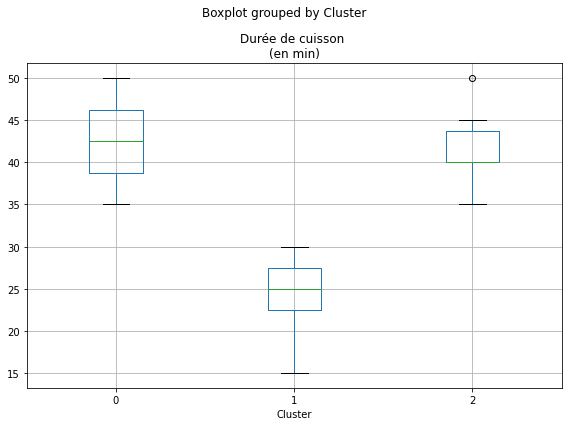

In [139]:
# Boxplot pour la durée de cuisson en fonction des clusters :
fig, ax = plt.subplots(figsize=(8, 6))
recette.boxplot(column='Durée de cuisson \n(en min)', by='Cluster', ax=ax)
ax.set_title('Durée de cuisson \n(en min)')
plt.tight_layout()
plt.show()

##### Température (en °C) :

In [140]:
# Calcul des statistiques descriptives pour chaque attribut numérique dans chaque cluster :
cluster_température_stats = recette.groupby('Cluster')[['Température \n(en °C)']].describe()
cluster_température_stats

Température \n(en °C)                                              \
                        count        mean       std    min     25%    50%   
Cluster                                                                     
0                         2.0  150.000000  0.000000  150.0  150.00  150.0   
1                         7.0  178.571429  3.779645  170.0  180.00  180.0   
2                         6.0  177.500000  4.183300  170.0  176.25  180.0   

                       
           75%    max  
Cluster                
0        150.0  150.0  
1        180.0  180.0  
2        180.0  180.0

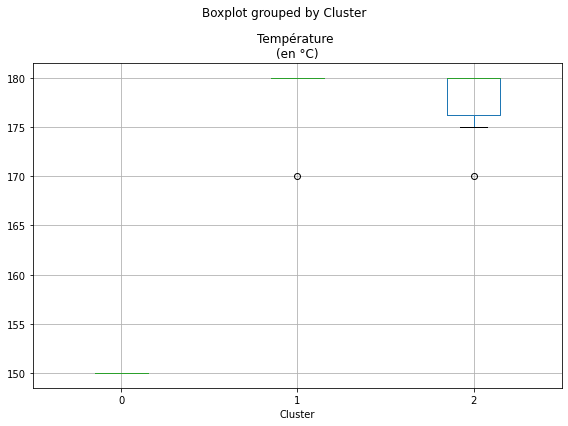

In [141]:
# Boxplot pour la température en fonction des clusters :
fig, ax = plt.subplots(figsize=(8, 6))
recette.boxplot(column='Température \n(en °C)', by='Cluster', ax=ax)
ax.set_title('Température \n(en °C)')
plt.tight_layout()
plt.show()

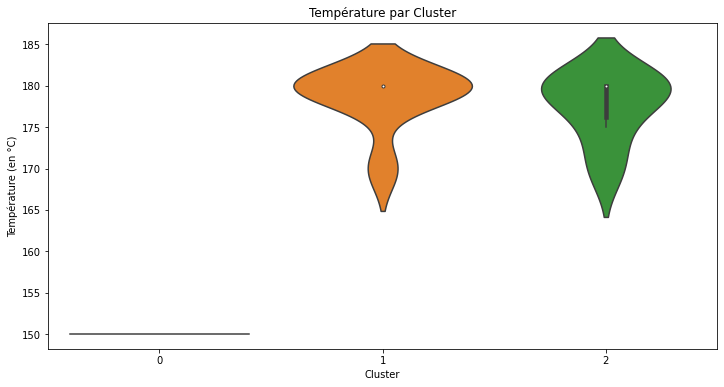

In [151]:
# Graphiques de Violon (Violin Plots) :
plt.figure(figsize=(12, 6))
sns.violinplot(data=recette, x='Cluster', y='Température \n(en °C)')
plt.title('Température par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Température (en °C)')
plt.show()

* Pour "Durée de préparation (en min)":
Le Cluster 0 a une durée de préparation moyenne de 15 minutes, allant de 5 à 20 minutes.
Le Cluster 1 a une durée de préparation moyenne de 17.5 minutes, avec des valeurs allant de 15 à 30 minutes.
Le Cluster 2 a une durée de préparation moyenne de 15 minutes avec une valeur minimale et maximale de 15 minutes.

* Pour "Durée de cuisson (en min)":
Le Cluster 0 a une durée de cuisson moyenne de 24.29 minutes, avec des valeurs allant de 15 à 30 minutes.
Le Cluster 1 a une durée de cuisson moyenne de 41.67 minutes, avec des valeurs allant de 35 à 50 minutes.
Le Cluster 2 a une durée de cuisson moyenne de 42.5 minutes, avec des valeurs allant de 35 à 50 minutes.

* Pour "Température (en °C)":
Le Cluster 0 a une température moyenne de 178.57°C, avec des valeurs allant de 170°C à 180°C.
Le Cluster 1 a une température moyenne de 177.5°C, avec des valeurs allant de 170°C à 180°C.
Le Cluster 2 a une température moyenne de 150°C, avec une valeur minimale et maximale de 150°C.

On peut remarquer que le Cluster 0 a une durée de cuisson plus courte, le Cluster 2 a une température de cuisson moins élevée.

##### Ingrédients :

In [142]:
# Analyser les attributs binaires des ingrédients par cluster :
ingredients = ["amandes tranchées", "beurre", "beurre végétal", "bicarbonate de soude", "cacao", "café", "chocolat", "compote de pomme", "eau de fleur d'oranger", "farine", "farine sans gluten", "flocons d'avoine en poudre sans gluten", "huile", "huile végétale", "jus de citron", "lait", "lait végétal", "levure chimique", "levure chimique sans gluten", "liqueur", "maïzena", "poudre d'amandes" , "produits laitiers", "purée de fruit", "sel", "sucre", "sucre en poudre", "sucre vanillé", "vanille", "yaourt nature végétal", "zestes d'un citron", "œuf"]  
ingredients_proportions = recette.groupby('Cluster')[ingredients].mean()
ingredients_proportions

,amandes tranchées,beurre,beurre végétal,bicarbonate de soude,cacao,café,chocolat,compote de pomme,eau de fleur d'oranger,farine,...,produits laitiers,purée de fruit,sel,sucre,sucre en poudre,sucre vanillé,vanille,yaourt nature végétal,zestes d'un citron,œuf
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,1.000000
1,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,0.285714,0.000000,0.142857,0.142857,...,0.142857,0.000000,0.142857,0.857143,0.000000,0.142857,0.285714,0.142857,0.142857,1.000000
2,0.166667,0.000000,0.000000,0.333333,0.166667,0.166667,0.333333,0.166667,0.000000,0.333333,...,0.000000,0.166667,0.166667,0.833333,0.166667,0.000000,0.166667,0.000000,0.166667,0.833333


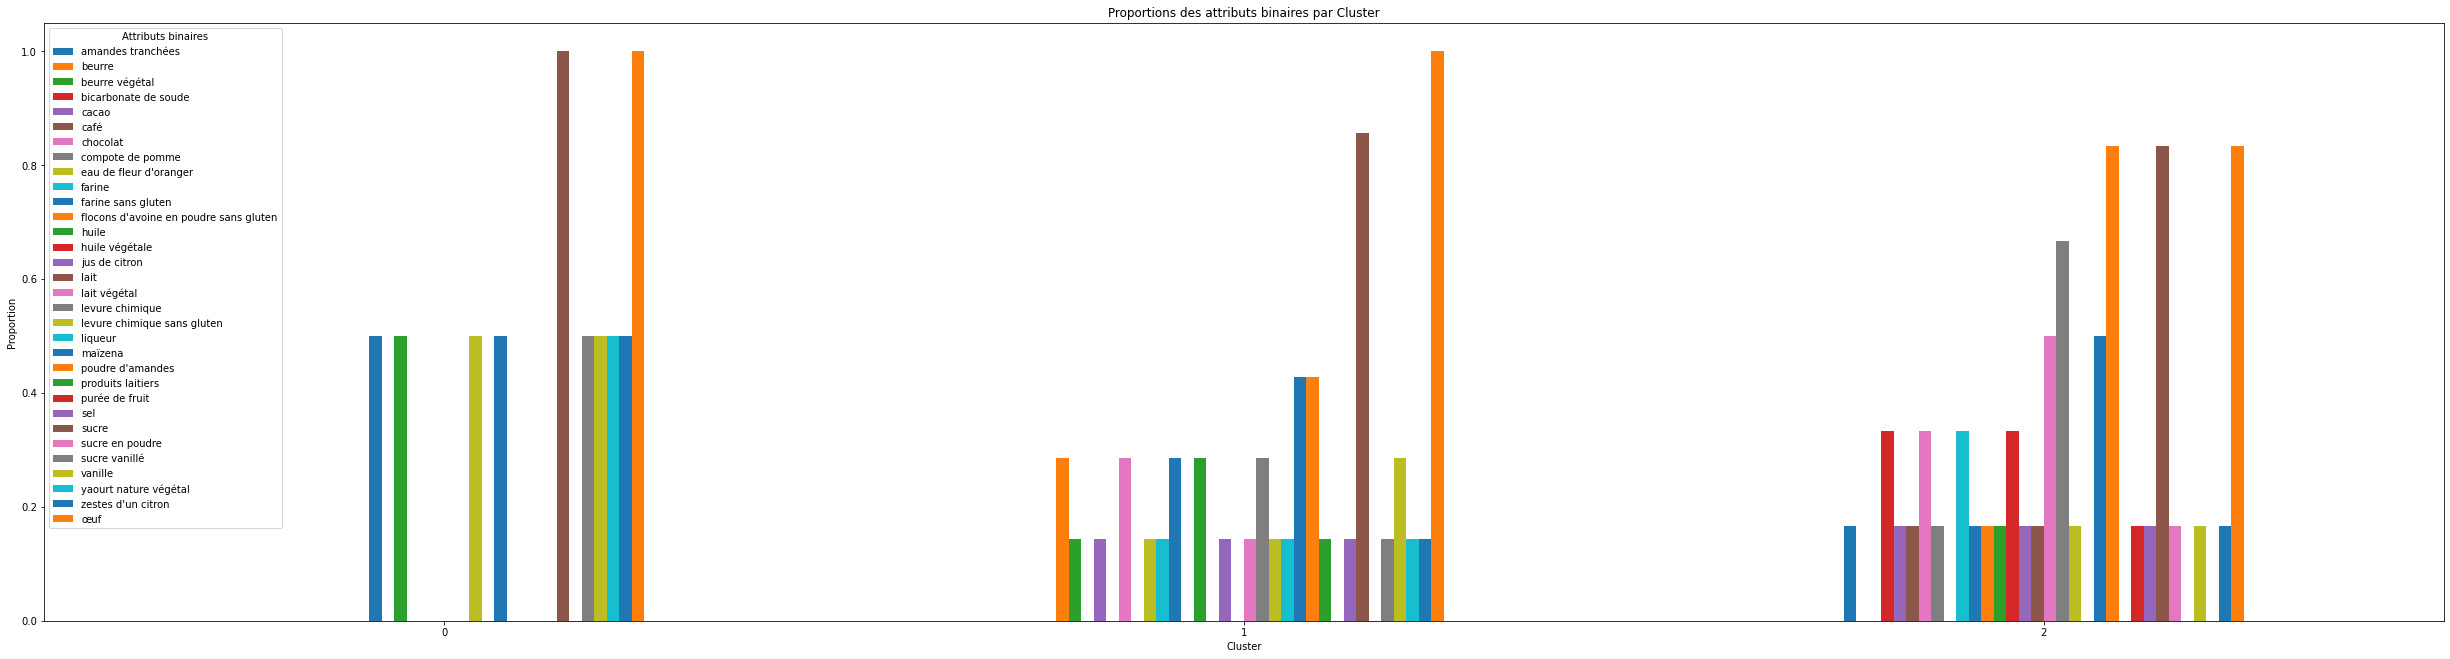

In [143]:
# Afficher les proportions sous forme de graphique à barres :
ingredients_proportions.plot(kind='bar', figsize=(43, 11))
plt.title("Proportions des attributs binaires par Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Attributs binaires")
plt.show()

Pour le Cluster 2, on peut voir que la valeur moyenne pour l'attribut "sucre" est de 1, ce qui signifie que cet attribut est présent dans toutes les recettes de ce cluster. De même, l'attribut "beurre" a une valeur moyenne d'environ 0.29 dans le Cluster 0, ce qui indique qu'il est présent dans environ 29% des recettes de ce cluster.

##### Catégories de gâteaux :

In [144]:
# Analyser les attributs binaires des catégories de gâteaux par cluster :
categories = ["gâteau au chocolat", "gâteau au citron", "gâteau aux amandes", "gâteau marbré", "gâteau moelleux"]
categories_proportions = recette.groupby('Cluster')[categories].mean()
categories_proportions

,gâteau au chocolat,gâteau au citron,gâteau aux amandes,gâteau marbré,gâteau moelleux
Cluster,,,,,
0,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.285714,0.142857,0.142857,0.285714,0.142857
2,0.666667,0.166667,0.333333,0.000000,0.000000


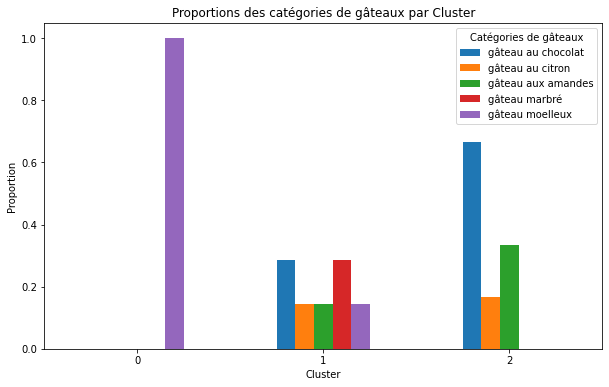

In [145]:
# Afficher les proportions des attributs binaires des catégories de gâteaux sous forme de graphique à barres :
categories_proportions.plot(kind='bar', figsize=(10, 6))
plt.title("Proportions des catégories de gâteaux par Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Catégories de gâteaux")
plt.show()

On peut remarquer pour :
* Cluster 0 :
Ce cluster présente une variation dans les types de gâteaux, avec une proportion relativement élevée de gâteaux au chocolat et de gâteaux marbrés.

* Cluster 1 :
Les recettes de ce cluster sont principalement des gâteaux au chocolat et de gâteaux aux amandes.

* Cluster 2 :
Les recettes dans ce cluster sont principalement des gâteaux moelleux.

##### Étiquettes diététiques associées :

In [146]:
# Analyser les attributs binaires des étiquettes diététiques associées par cluster :
diet_labels = ["classique", "sans gluten", "sans lactose", "végétalien"]
diet_proportions = recette.groupby('Cluster')[diet_labels].mean()
diet_proportions

,classique,sans gluten,sans lactose,végétalien
Cluster,,,,
0,0.000000,1.000000,1.000000,0.000000
1,0.142857,0.857143,0.571429,0.142857
2,0.166667,0.666667,0.666667,0.166667


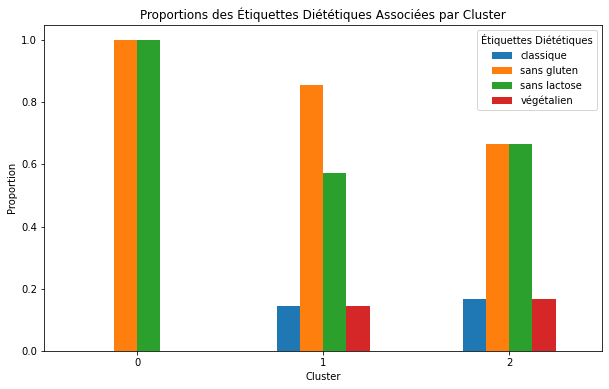

In [147]:
# Afficher les proportions sous forme de graphique à barres :
diet_proportions.plot(kind='bar', figsize=(10, 6))
plt.title("Proportions des Étiquettes Diététiques Associées par Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Étiquettes Diététiques")
plt.show()

On peut remarquer pour :

* Cluster 0 : 
Les recettes dans ce cluster sont étiquetées majorement comme "sans gluten".
Il y a aussi une proportion significative de recettes étiquetées comme "sans lactose".
Moins de recettes sont étiquetées comme "classique" et "végétalien" dans ce cluster.

* Cluster 1 : 
Les recettes dans ce cluster ont des proportions équilibrées entre les étiquettes diététiques "sans gluten" et "sans lactose".
Certaines recettes sont étiquetées comme "classique" et "végétalien".

* Cluster 2 : 
Toutes les recettes dans ce cluster sont étiquetées comme "sans gluten" et "sans lactose".

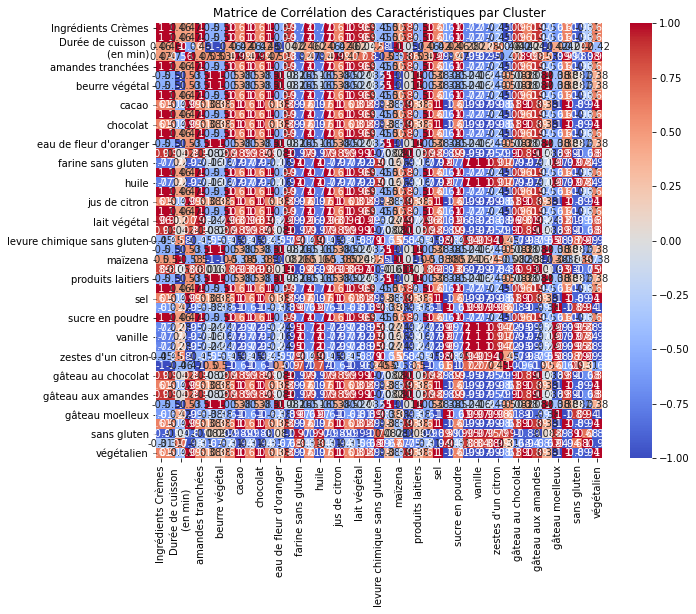

In [153]:
# Matrices de Corrélation :
cluster_summary_corr = cluster_summary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_summary_corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Caractéristiques par Cluster')
plt.show()